In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
from multiprocessing import Pool

In [3]:
# def datadownload(ticker: str):
#     df=yf.download(ticker, start = '2015-01-01', end = '2022-11-10')
#     return df

In [4]:
# df=datadownload('AAPL')

In [5]:
# def addSMA(data: pd.DataFrame, slow: int):
#     data['SMA']=data['Adj Close'].rolling(slow).mean()
# def addFMA(data: pd.DataFrame, fast: int):
#     data['FMA']=data['Adj Close'].rolling(fast).mean()

In [6]:
# addSMA(df, 60)
# addFMA(df, 20)
# df=df.dropna()
# df=df[['Adj Close','SMA','FMA']]


In [7]:
# Method to build data
def buildData(ticker: str)-> pd.DataFrame:
    df=yf.download(ticker, start = '2015-01-01', end = '2022-11-10')
    return df

In [8]:

# df = buildData('^GSPC')
# Method to take a dataframe, and backtest it to find returns using CMA strategy
# with bounds that are customizable
def backtest(df: pd.DataFrame, slow: int, fast: int):
    df['SMA']=df['Adj Close'].rolling(slow).mean()
    df['FMA']=df['Adj Close'].rolling(fast).mean()
    df=df.dropna()
    df=df[['Adj Close','SMA','FMA']]
    buy = []
    sell = []
    buyprice = []
    sellprice = []
    for i in range(len(df)):
        if df.FMA.iloc[i] > df.SMA.iloc[i] \
        and df.FMA.iloc[i-1]<df.SMA.iloc[i-1]:
            buy.append(i)
            buyprice.append(df.iloc[i]['Adj Close'])
        elif df.FMA.iloc[i]< df.SMA.iloc[i] \
        and df.FMA.iloc[i-1]>df.SMA.iloc[i-1]:
            sell.append(i)
            sellprice.append(df.iloc[i]['Adj Close'])
    rets = 0
    for r in range(len(buyprice)):
        rets+=((sellprice[r]-buyprice[r])/buyprice[r])
    rets = rets*100
    return rets

[*********************100%***********************]  1 of 1 completed


In [9]:
# maxLoss = backtest(df,2,1)
# maxGain = backtest(df,2,1)
# for s in range(2,100):
#     for e in range(s+1,101):
#         ret = backtest(df,e,s)
#         if ret>maxGain:
#             maxGain=ret
#         elif ret<maxLoss:
#             maxLoss=ret
# print(maxGain)
# print(maxLoss)

In [10]:
# Method to return the max gains of a stock using intervals of 5 up to 100, testing all 
# combinations of fast and small averages from 1-100 days, in intervals of 5
def maxGain(df):
    maxg = (-100000000)
    for s in range(1,100,5):
        for e in range(s+5,101,5):
            ret = backtest(df,e,s)
            if ret>maxg:
                maxg= ret
                maxvals = [s,e]
    return maxg, maxvals

In [11]:
# Same as maxGain, but returns the worst ranges for fast and small moving average
# in intervals 1-100, testing all possible combos in intervals of 5
def maxLoss(df):
    ming = (10000000000)
    for s in range(1,100,5):
        for e in range(s+5,101,5):
            ret = backtest(df,e,s)
            if ret<ming:
                ming= ret
                minvals = [s,e]
    return ming, minvals
# 70.69237673980793
# -55.38334200038927

In [ ]:
data = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0][['Symbol']]
for index,row in data.iterrows():
    df = buildData(row['Symbol'])
    print(f"{row['Symbol']} max gains: {maxGain(df)}")
    print(f" max losses: {maxLoss(df)}")

[*********************100%***********************]  1 of 1 completed
MMM max gains: (35.306837344225585, [21, 66])
 max losses: (-47.9535872834203, [11, 31])
[*********************100%***********************]  1 of 1 completed
AOS max gains: (83.873996612695, [86, 96])
 max losses: (-75.9896856692702, [1, 16])
[*********************100%***********************]  1 of 1 completed
ABT max gains: (79.51025016893577, [6, 11])
 max losses: (-94.917639502451, [1, 6])
[*********************100%***********************]  1 of 1 completed
ABBV max gains: (92.6282404906954, [81, 91])
 max losses: (-101.5715415992808, [1, 61])
[*********************100%***********************]  1 of 1 completed
ABMD max gains: (270.0719014007442, [66, 91])
 max losses: (-232.02479208440175, [6, 71])
[*********************100%***********************]  1 of 1 completed
ACN max gains: (105.47150967312633, [6, 76])
 max losses: (-102.51988097379154, [1, 6])
[*********************100%***********************]  1 of 1 com

In [13]:
# p1 = mp.Process(target=maxGain, args = (df))
# p2 = mp.Process(target=minGain, args = (df))
# p1.start()
# p2.start()
# with Pool() as pool:
#     maxGainPer = pool.map(maxGain, df)
#     minGainPer = pool.map(minGain, df)
# print (maxGainPer)
# print(minGainPer)

KeyError: 'FMA'

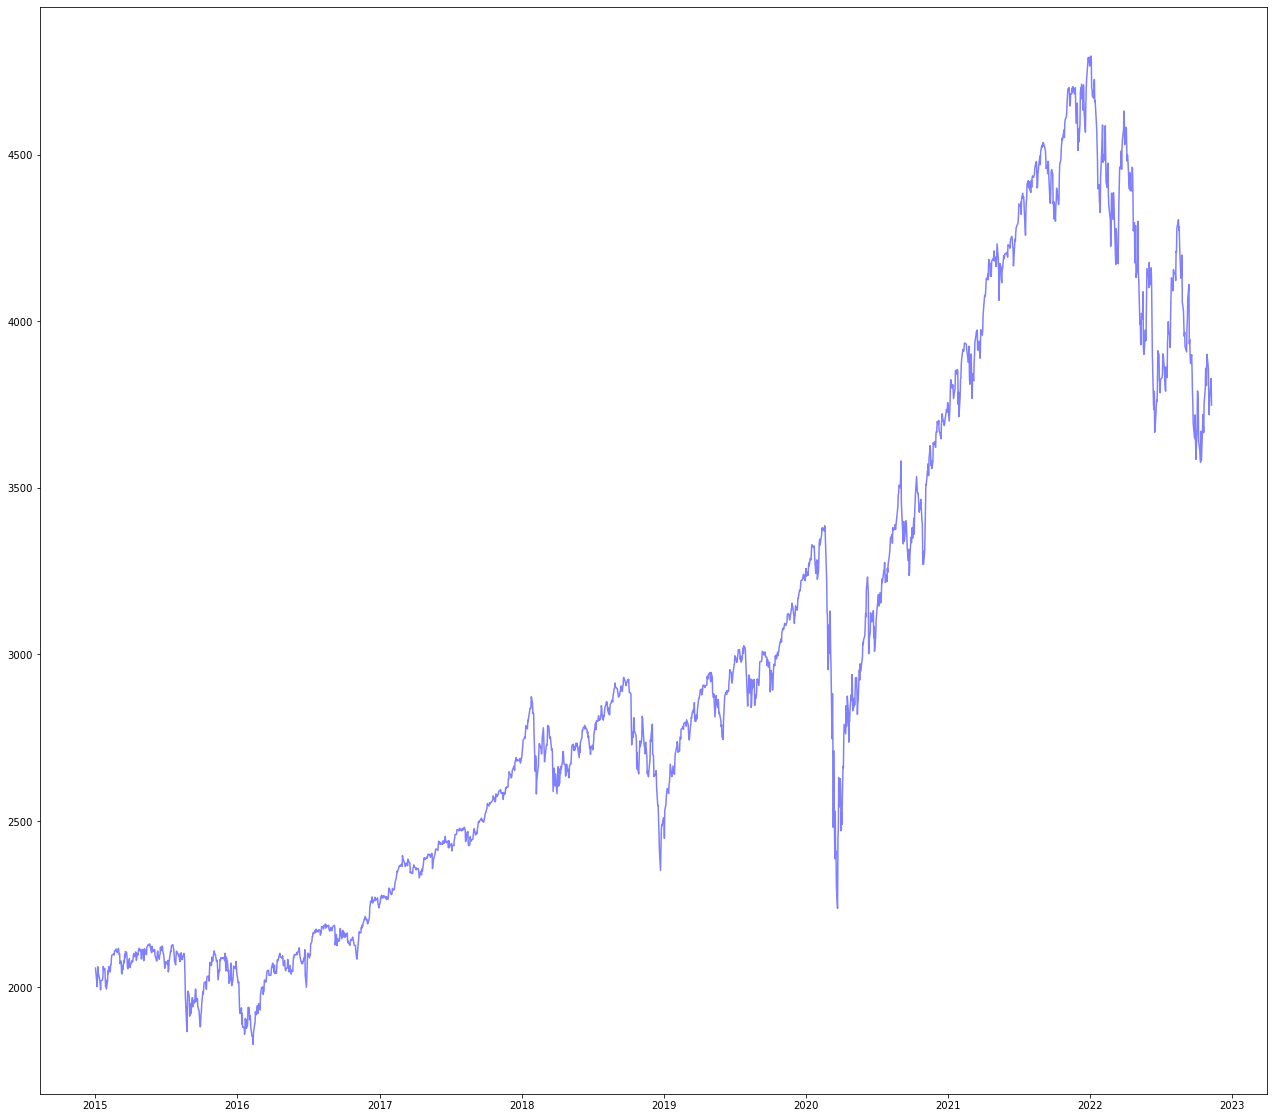

In [14]:
plt.figure(figsize=(22,20))
plt.plot(df['Adj Close'], label = 'Asset Price', c='blue', alpha = 0.5)
plt.plot(df['FMA'], label = 'FMA', c='k', alpha = 0.85)
plt.plot(df['SMA'], label = 'SMA', c='magenta', alpha = 0.85)
plt.scatter(df.iloc[buy].index, df.iloc[buy]['Adj Close'], marker = '^', color = 'g', s=100)
plt.scatter(df.iloc[sell].index, df.iloc[sell]['Adj Close'], marker = 'v', color = 'r', s=100)
plt.legend()
plt.show()
